# Inspirational piece

http://farm8.staticflickr.com/7046/8690129489_f571afd745_o.png

My goal: to do the same kind of "small multiples", not about players, but about different runner categories at the “Course de l'Escalade" -- a popular marathon in Geneva.

The race has many different categories which makes it difficult to understand for people of the outside.

* two polished charts
* a diary:
* * 6 questions
* * 3 headlines

(Think about annotation)

# Diary

The first idea was to plot all categories at the same time. It's more difficult than I thought because there's too many of these categories: 36 categories!



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

import_names = False # for GitHub

Fichiers:
* inscriptions
* résultats

In [2]:
df = pd.read_csv('Data_selection.csv')

In [3]:
df.head(2)

,Unnamed: 0,catégorie,rang,nom,année,pays,temps net,Age,vitesse
0,0,Escaladelite Hommes,1.,Abraham Tadesse,1982,CH,"20.54,5",33.0,21.386225
1,1,Escaladelite Hommes,25.,Hawkins Derek,1989,GB,"21.53,3",26.0,20.404960


In [4]:
def to_float(value):
    try:
        return float(str.replace(value, ',', '.'))
    except:
        return None

def to_int(value):
    if value == value:
        return int(value)
    else:
        return value

def swap_name(value):
    parts = value.split(' ')
    parts = [i for i in parts if i != '']
    if len(parts)>2:
        print("Check this name:", value, '/', ' '.join(parts[-1:] + parts[:-1]))
    return ' '.join(parts[-1:] + parts[:-1])
    
# df['vitesse f'] = df['vitesse'].apply(to_float) # no more required for 2015
df['vitesse f'] = df['vitesse']

In [5]:
# for the online version (I can't put the names online)
if import_names == False:
    df['nom'] = 'dummy'

In [6]:
category = 'catégorie'
categories = [['Escaladelite Hommes'], ['Escaladelite Femmes'], ['Hommes I', 'Hommes II', 'Hommes III', 'Hommes IV'], ['Femmes I', 'Femmes II', 'Femmes III', 'Femmes IV']]
plot_titles = ['Elite Men', 'Elite Women', 'Men', 'Women']

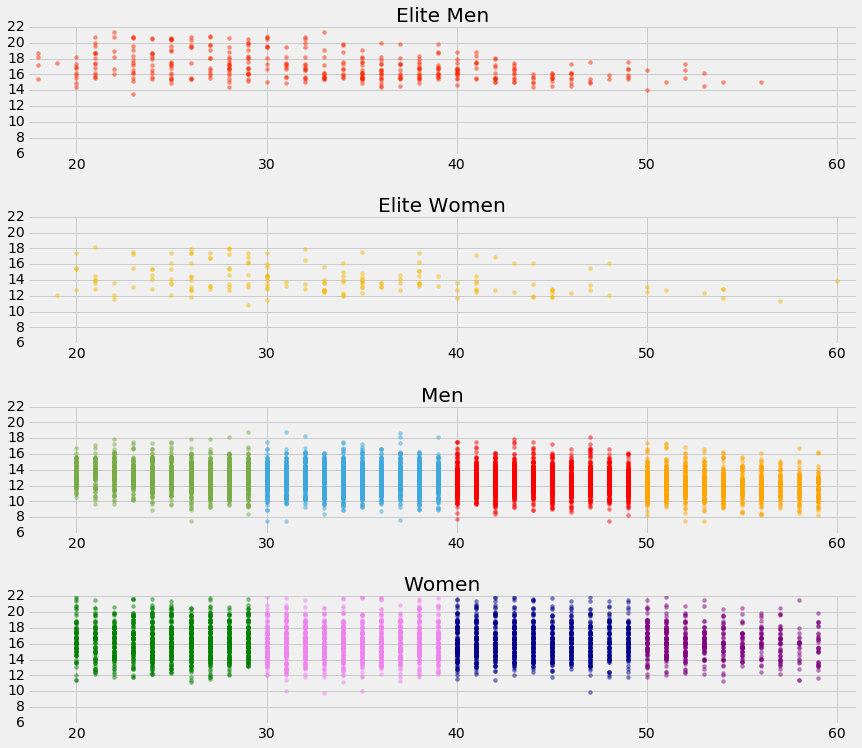

In [7]:
plt.style.use('fivethirtyeight')
#csfont = {'fontname':'Comic Sans MS'}
#hfont = {'fontname':'Helvetica'}


#plt.xlabel('xlabel', **hfont)
#plt.show()


x_col = 'vitesse f'
y_col = 'Age'
nrows = 4; ncols = 1
num_plots = nrows * ncols  # number of subplots

fig = plt.figure(figsize=(12, 10))

axes = [plt.subplot(nrows,ncols,i) for i in range(1,num_plots+1)]

plt.tight_layout(pad=0, w_pad=3, h_pad=1)
plt.subplots_adjust(hspace=.5)

colors = ['#FF2700', '#F6B900', '#77AB43', '#3EA8DC', 'red', 'orange', 'green', 'violet', 'darkblue', 'purple']

count = 0

for i in range(num_plots):
    ax = axes[i]
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(plot_titles[i])
    
    for item in categories[i]:
        dfx = df[df[category]==item]

    #   BAR CHARTS
        x = dfx[x_col]
        y = dfx[y_col]

        ax.scatter(dfx['Age'], dfx['vitesse f'], color=colors[count], cmap='gray', linewidth=0, alpha=0.5)
        count += 1
        ax.set_label(item)

        
    ax.set_xlim([17.5, 61])
    ax.set_ylim([6, 22])

plt.savefig('output.pdf')

In [8]:
# Data frames for men and women elites

dfm = df[df['catégorie'] == 'Escaladelite Hommes']
dfw = df[df['catégorie'] == 'Escaladelite Femmes']

# top 3
dfm_top3 = dfm.sort_values(by='vitesse f', ascending=False).head(3)
dfw_top3 = dfw.sort_values(by='vitesse f', ascending=False).head(3)

# oldest runner
dfm_oldest = dfm.sort_values(by='Age', ascending=False).head(1)
dfw_oldest = dfw.sort_values(by='Age', ascending=False).head(1)

Check this name: Jargy Clara Mina / Mina Jargy Clara


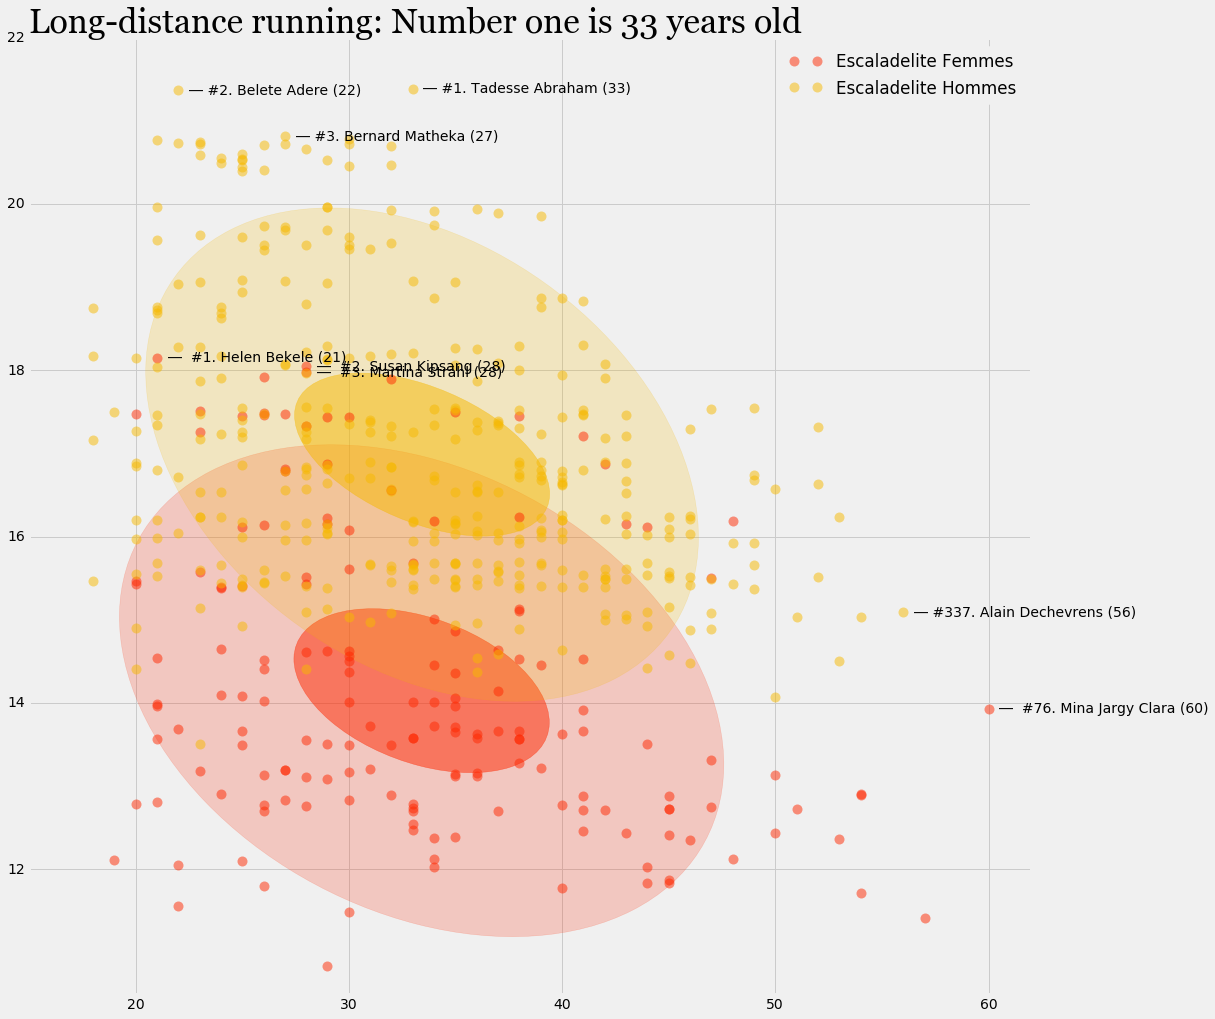

In [9]:
cat_elite = ['Escaladelite Hommes', 'Escaladelite Femmes']

x_col = 'Age'
y_col = 'vitesse f'

from matplotlib.patches import Ellipse

def draw_ellipse(_width, _height, _angle, _alpha):
    return Ellipse((np.mean(x), np.mean(y)),
    width=_width, height=_height,
    angle=_angle,
    facecolor = colors[count],
    edgecolor = colors[count],
                  alpha=_alpha)    


colors = ['#FF2700', '#F6B900', '#77AB43', '#3EA8DC']
darkColors = ['#AC1C08', '#CA9105', '#487A08', '#076083']

colors.extend(colors)
darkColors.extend(darkColors)
colors.extend(colors)
darkColors.extend(darkColors)
colors.extend(colors)
darkColors.extend(darkColors)
colors.extend(colors)
darkColors.extend(darkColors)


df = df[df['vitesse f'] == df['vitesse f']]

fig, ax = plt.subplots(figsize=(16,16))
count = 0
for category, group in df.groupby('catégorie'):
    if category not in cat_elite:
        continue
    ax.plot(group[x_col], group[y_col], marker='o', linestyle='', color=colors[count], label=category, markersize=10, markeredgewidth=0, alpha=.5)
#    ax.plot(group[x_col].mean(), group[y_col].mean(), marker='o', color=darkColors[count], linestyle='solid', markersize=16, label=category, markeredgewidth=0)
    
    x = group[x_col]
    y = group[y_col]
    
    # 1 - q 0.95
    width = group[x_col].quantile(q=0.05) - group[x_col].quantile(q=0.95)
    height = group[y_col].quantile(q=0.05) - group[y_col].quantile(q=0.95)
    cov = np.cov(x, y) # Ref: Estimate a covariance matrix, given data and weights.
    lambda_, v = np.linalg.eig(cov) # Ref: Compute the eigenvalues and right eigenvectors of a square array.
    angle=np.rad2deg(-np.arccos(v[0, 0]))
    #print("width={}, height={}, angle={}".format(width, height, angle))
    ell = draw_ellipse(width, height, angle, 0.2)
    ax.add_artist(ell)
    
    # 2 - q 0.5
    width = group[x_col].quantile(q=0.5) - group[x_col].quantile(q=0.05)
    height = group[y_col].quantile(q=0.5) - group[y_col].quantile(q=0.05) 
    cov = np.cov(x, y) # Ref: Estimate a covariance matrix, given data and weights.
    lambda_, v = np.linalg.eig(cov) # Ref: Compute the eigenvalues and right eigenvectors of a square array.
    angle=np.rad2deg(-np.arccos(v[0, 0]))
    # print("width={}, height={}, angle={}".format(width, height, angle))
    ell = draw_ellipse(width, height, angle, 0.5)
    ax.add_artist(ell)
    
    count += 1

ax.legend(loc='upper right')

for index, row in dfm_top3.iterrows():
    x_gap = .5
    ax.text(row['Age']+x_gap, row['vitesse f']-.05, "–– #{} {} ({})".format(row['rang'], swap_name(row['nom']), int(row['Age'])), )

for index, row in dfw_top3.iterrows():
    ax.text(row['Age']+x_gap, row['vitesse f']-.05, "–– #{} {} ({})".format(row['rang'], swap_name(row['nom']), int(row['Age'])))

for index, row in dfw_oldest.iterrows():
    ax.text(row['Age']+x_gap, row['vitesse f']-.05, "–– #{} {} ({})".format(row['rang'], swap_name(row['nom']), int(row['Age'])))
for index, row in dfm_oldest.iterrows():
    ax.text(row['Age']+x_gap, row['vitesse f']-.05, "–– #{} {} ({})".format(row['rang'], swap_name(row['nom']), int(row['Age'])))


    
    

ax.set_xlim([15, 62])
ax.set_ylim([10.5, 22])

plt.title('Long-distance running: Number one is 33 years old',{'fontname':'Georgia', 'fontsize':34, 'ha':'left'}, loc='left')


plt.savefig('Escalade.pdf', transparent=True, bbox_inches='tight')

In [10]:
# matplotlib.text.Text? #-> list of text parameters, to keep in good place!
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')[:3]

/Users/paul/.virtualenvs/dataanalysis/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


['/Library/Fonts/ACaslonPro-Bold.otf',
 '/System/Library/Fonts/SFNSText-RegularG1.otf',
 '/Library/Fonts/HoboStd.otf']

In [11]:
dfw['vitesse f'].min()

10.839521401258173

In [12]:
dfm['vitesse'].max()

21.386225358968122

In [13]:
dfm.corr()


,Unnamed: 0,Age,vitesse,vitesse f
Unnamed: 0,1.000000,0.240450,-0.551114,-0.551114
Age,0.240450,1.000000,-0.385457,-0.385457
vitesse,-0.551114,-0.385457,1.000000,1.000000
vitesse f,-0.551114,-0.385457,1.000000,1.000000


In [14]:
dfw.shape

(196, 10)